In [1]:
# importing necessary modules

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
# going through the data

In [4]:
df=pd.read_csv('heart.csv')

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# checking for null values

In [7]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# visualizing data

<AxesSubplot:>

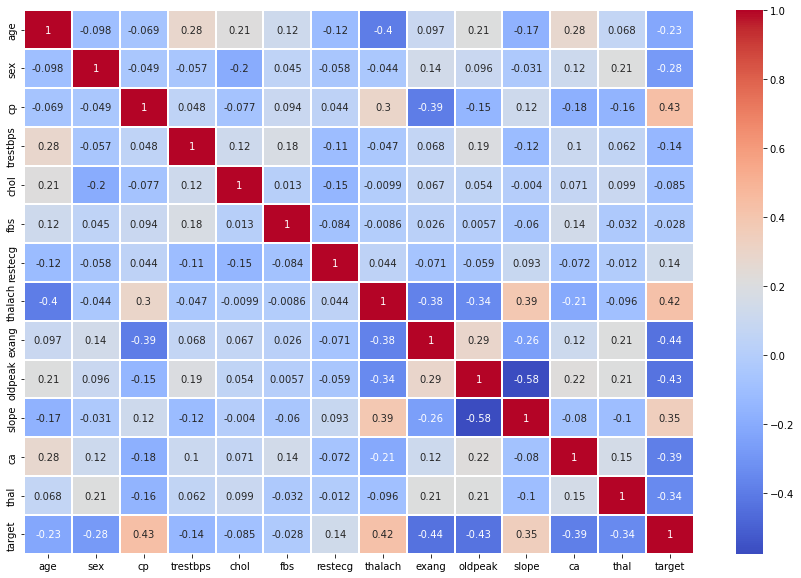

In [9]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,linewidth=0.2,cmap='coolwarm')

In [10]:
# now we will plot some countplots which will represent the relations between the categorical values and the target variable(0 or 1)
# shows the count of categorical values

<AxesSubplot:xlabel='thal', ylabel='count'>

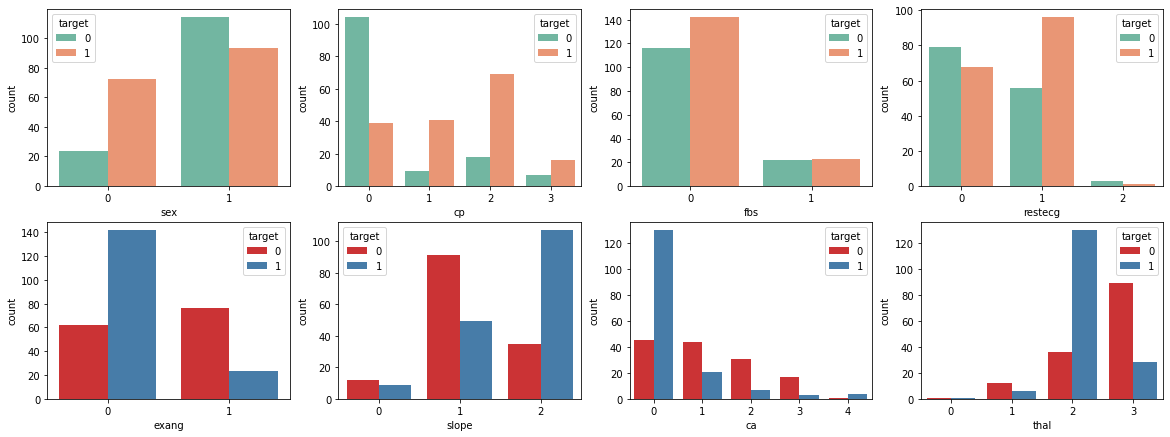

In [11]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.countplot(data=df,x='sex',hue='target',palette='Set2')
plt.subplot(4,4,2)
sns.countplot(data=df,x='cp',hue='target',palette='Set2')
plt.subplot(4,4,3)
sns.countplot(data=df,x='fbs',hue='target',palette='Set2')
plt.subplot(4,4,4)
sns.countplot(data=df,x='restecg',hue='target',palette='Set2')
plt.subplot(4,4,5)
sns.countplot(data=df,x='exang',hue='target',palette='Set1')
plt.subplot(4,4,6)
sns.countplot(data=df,x='slope',hue='target',palette='Set1')
plt.subplot(4,4,7)
sns.countplot(data=df,x='ca',hue='target',palette='Set1')
plt.subplot(4,4,8)
sns.countplot(data=df,x='thal',hue='target',palette='Set1')

In [12]:
# now we will plot some distplots which will represent the range of values that the continuous values posses.

<AxesSubplot:xlabel='oldpeak', ylabel='Density'>

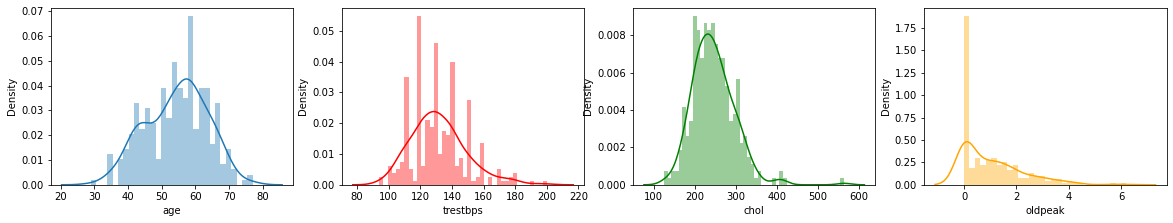

In [14]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.distplot(a=df['age'],bins=30)
plt.subplot(4,4,2)
sns.distplot(a=df['trestbps'],bins=40,color='red')
plt.subplot(4,4,3)
sns.distplot(a=df['chol'],bins=50,color='green')
plt.subplot(4,4,4)
sns.distplot(a=df['oldpeak'],bins=30,color='orange')

In [15]:
# The following plots depict the status of correlations between 3 different variables i.e. target, gender and 1 of 4 variables that contain continous numerical values.
# It is depicted using the boxplot where the green box indicates no heart disease and orange box represents the presence of heart disease.
# The X-axis represents age, resting blood pressure, cholesterol and oldpeak values.
#The 2 plots are further classified based on gender and the y-axis represents the target(0 or 1).

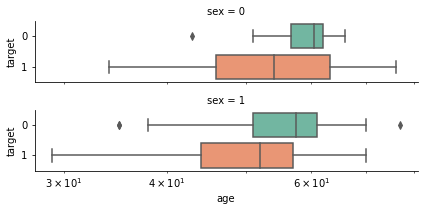

In [16]:
g = sns.catplot(x="age", y="target", row="sex",kind="box", orient="h", height=1.5, aspect=4,data=df,palette='Set2')
g.set(xscale='log')

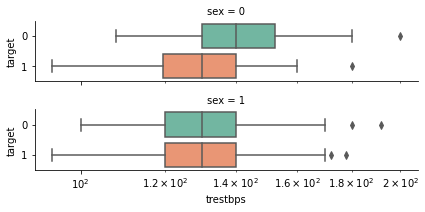

In [17]:
g = sns.catplot(x="trestbps", y="target", row="sex",kind="box", orient="h", height=1.5, aspect=4,data=df,palette='Set2')
g.set(xscale='log')

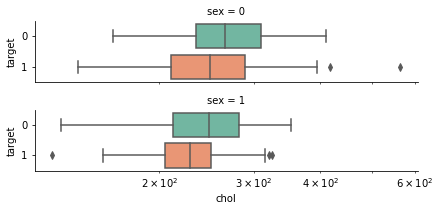

In [18]:
g = sns.catplot(x="chol", y="target", row="sex",kind="box", orient="h", height=1.5, aspect=4,data=df,palette='Set2')
g.set(xscale='log')

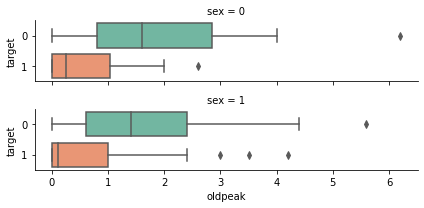

In [19]:
g = sns.catplot(x="oldpeak", y="target", row="sex",kind="box", orient="h", height=1.5, aspect=4,data=df,palette='Set2')

In [20]:
# data manipulation

In [21]:
# The values of few categorical variables cause ambiguity while fitting our model and training it
# we will make them all binary and convert ranges of 0-3 or 0-4 to 1's and 0's by adding columns
# this is done using pandas by specifying which columns need to be encoded and thus we get a dataframe with original columns replaced by our encoded variables

In [22]:
d1=pd.get_dummies(df['cp'],drop_first=True,prefix='cp')
d2=pd.get_dummies(df['thal'],drop_first=True,prefix='thal')
d3=pd.get_dummies(df['slope'],drop_first=True,prefix='slope')
df=pd.concat([df,d1,d2,d3],axis=1)
df.drop(['cp','thal','slope'],axis=1,inplace=True)

In [23]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1


In [25]:
# creating an extra feature
# we will perform some extremely simple feature engineering using the age column

In [26]:
# adults over the age of 60 are more likely to suffer from heart diseases than younger adults so we create a separate column to filter the entries in which the person is either 60 years or older
# we can do this by assigning 0's to those below 60 years of age and 1's to people over 60
# we name the column 'seniors' which means senior citizens

In [27]:
df['age'].min()

29

In [28]:
df['age'].max()

77

In [29]:
df['seniors'] = df['age'].map(lambda s: 1 if s >= 60 else 0)

In [30]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2,seniors
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,1,1,0,0,0,0,1
1,37,1,130,250,0,1,187,0,3.5,0,1,0,1,0,0,1,0,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,1,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,1,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,0,0,0,0,1,0,0,1,0


In [31]:
# splitting the data into train data and test data

In [32]:
X=df.drop('target',axis=1)
y=df['target']

In [33]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)

In [34]:
# scaling the data

In [35]:
scale=StandardScaler()
xtrain=scale.fit_transform(xtrain)
xtest=scale.transform(xtest)

In [36]:
# we will use Random Forest model
clf2=RandomForestClassifier(max_depth=2,random_state=0)
clf2.fit(xtrain,ytrain)
pred2=clf2.predict(xtest)
s2=accuracy_score(ytest,pred2)
print(s2*100)


83.51648351648352


In [38]:
# since accuracy is low so we will now try another model. We will try Logistic Regression
from sklearn.linear_model import LogisticRegression
clf1=LogisticRegression()
clf1.fit(xtrain,ytrain)
pred1=clf1.predict(xtest)
s1=accuracy_score(ytest,pred1)
print(s1*100)

82.41758241758241


In [40]:
# we will try KNN(k nearest neighbour)model
from sklearn.neighbors import KNeighborsClassifier
clf3=KNeighborsClassifier()
clf3.fit(xtrain,ytrain)
pred3=clf3.predict(xtest)
s3=accuracy_score(ytest,pred3)
print(s3*100)

82.41758241758241


In [42]:
# we will try SVM
from sklearn import svm
from sklearn.svm import SVC
clf4=svm.SVC(kernel='rbf',C=1)
clf4.fit(xtrain,ytrain)
pred4=clf4.predict(xtest)
s4=accuracy_score(ytest,pred4)
print(s4*100)

83.51648351648352


In [43]:
# confusion matrix
print(confusion_matrix(ytest,pred2))

[[33  8]
 [ 7 43]]


In [ ]:
# our classifier has predicted 33 + 43 outcomes correctly and 8 + 7 outcomes wrongly(accuracy: 83.52%)